In [1]:
import os
import tarfile
import urllib
import pandas as pd

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

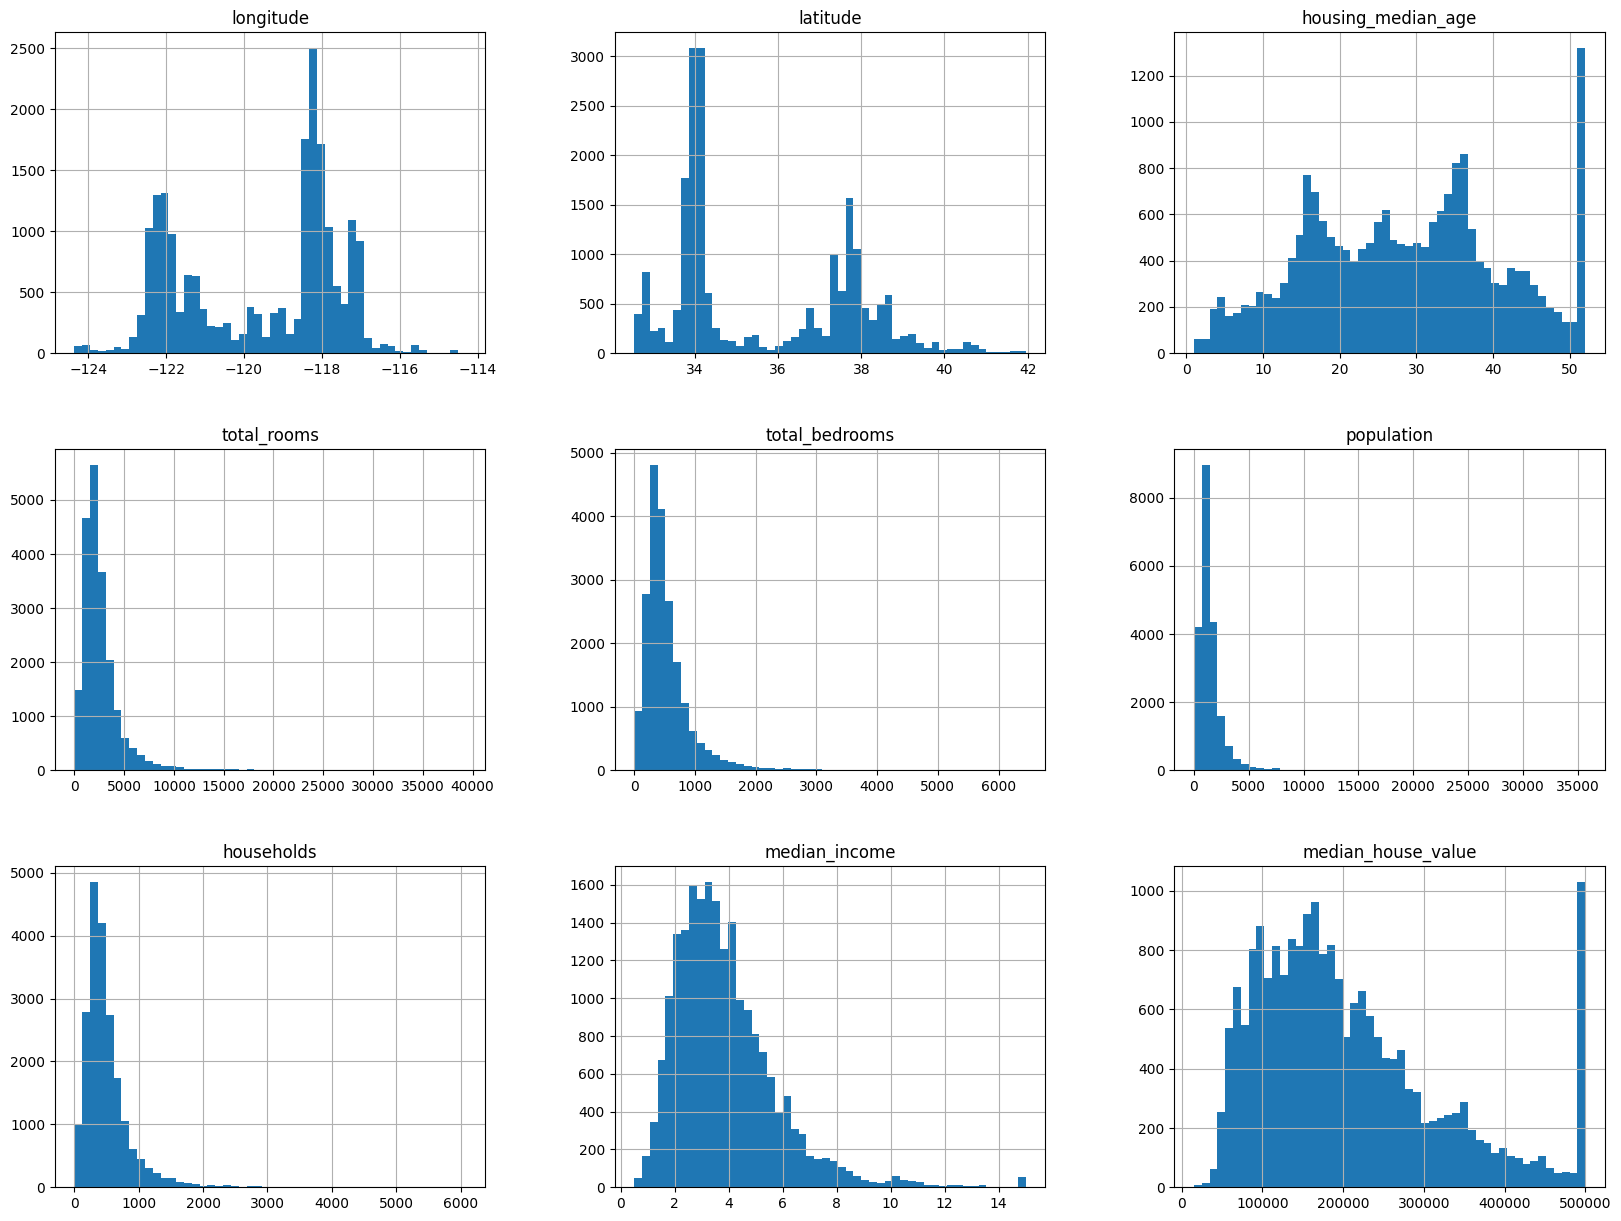

In [11]:
%matplotlib inline   
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
from zlib import crc32

In [17]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()

In [19]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [21]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

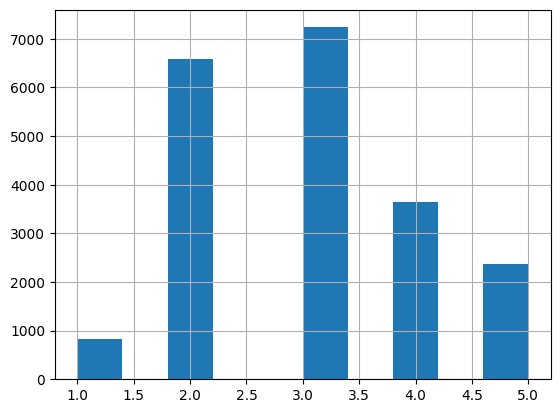

In [25]:
housing["income_cat"].hist()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [29]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

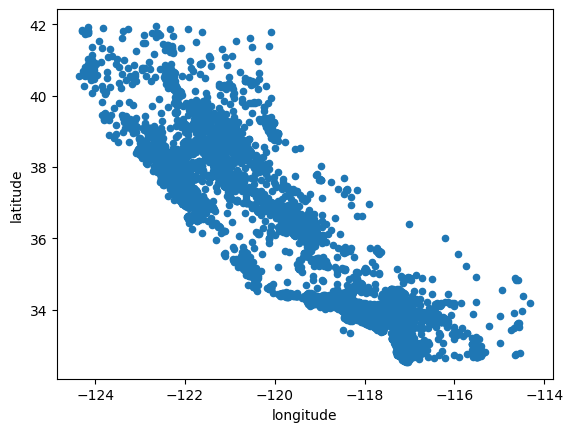

In [30]:

housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

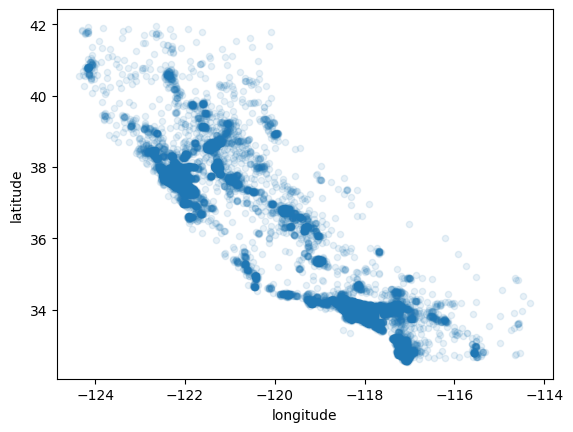

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

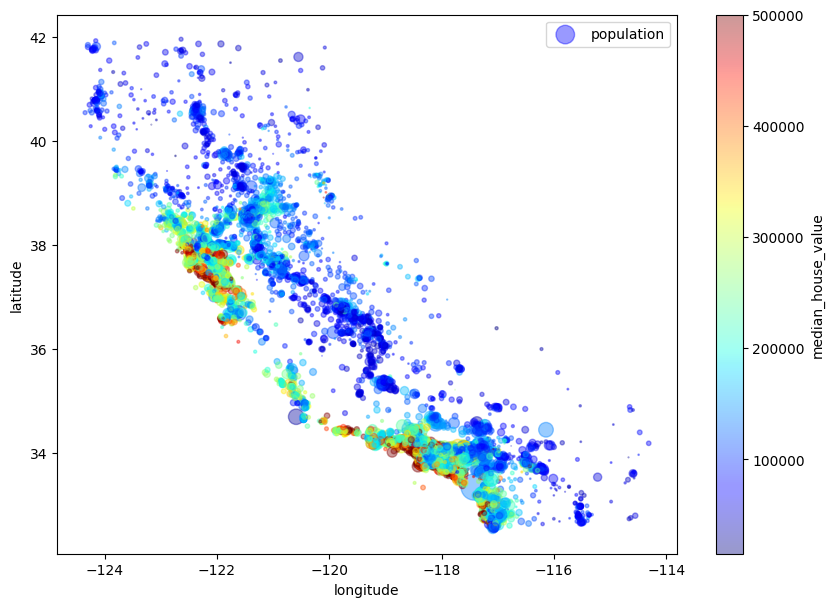

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

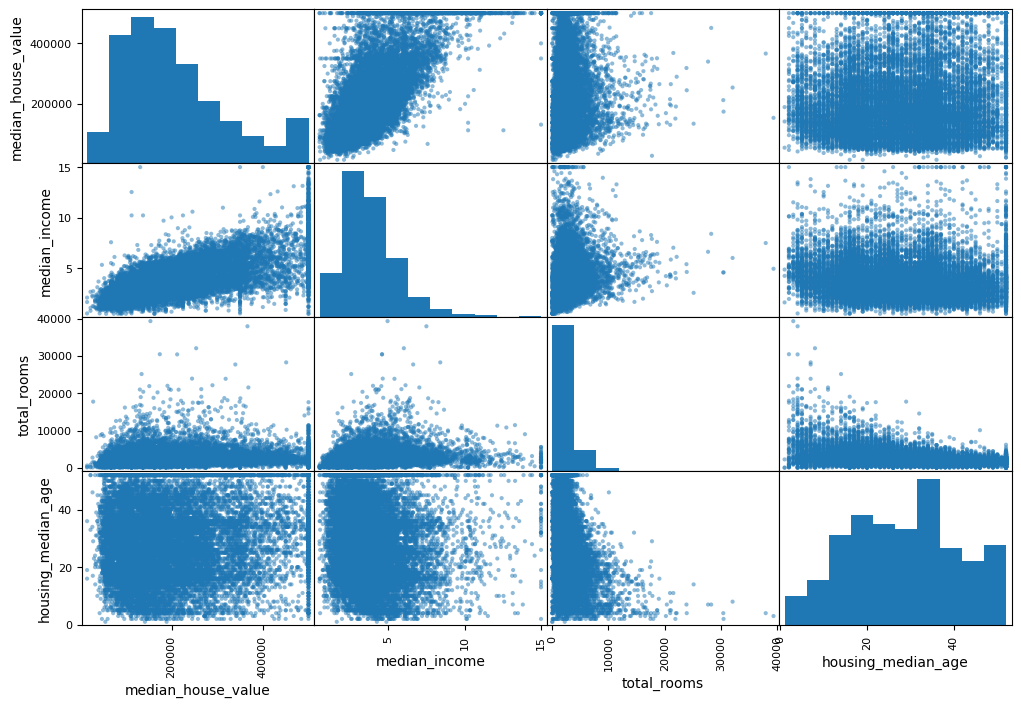

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

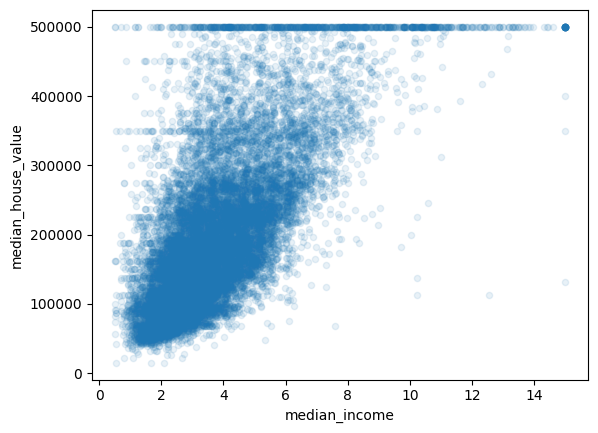

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)


In [38]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [39]:
corr_matrix = housing.corr()

In [40]:
corr_matrix

longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105823   
latitude                  -0.924478  1.000000            0.005737   
housing_median_age        -0.105823  0.005737            1.000000   
total_rooms                0.048909 -0.039245           -0.364535   
total_bedrooms             0.076686 -0.072550           -0.325101   
population                 0.108071 -0.115290           -0.298737   
households                 0.063146 -0.077765           -0.306473   
median_income             -0.019615 -0.075146           -0.111315   
median_house_value        -0.047466 -0.142673            0.114146   
rooms_per_household       -0.028374  0.107665           -0.147184   
bedrooms_per_room          0.095645 -0.116955            0.136768   
population_per_household  -0.000415  0.005426            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude                    0.048909        0.076686    0.108071    0.063146   
latitude                    -0.039245       -0.072550   -0.115290   -0.077765   
housing_median_age          -0.364535       -0.325101   -0.298737   -0.306473   
total_rooms                  1.000000        0.929391    0.855103    0.918396   
total_bedrooms               0.929391        1.000000    0.876324    0.980167   
population                   0.855103        0.876324    1.000000    0.904639   
households                   0.918396        0.980167    0.904639    1.000000   
median_income                0.200133       -0.009643    0.002421    0.010869   
median_house_value           0.135140        0.047781   -0.026882    0.064590   
rooms_per_household          0.127549        0.000426   -0.074665   -0.082971   
bedrooms_per_room           -0.192655        0.086883    0.037736    0.067090   
population_per_household    -0.024806       -0.028364    0.076232   -0.027411   

                          median_income  median_house_value  \
longitude                     -0.019615           -0.047466   
latitude                      -0.075146           -0.142673   
housing_median_age            -0.111315            0.114146   
total_rooms                    0.200133            0.135140   
total_bedrooms                -0.009643            0.047781   
population                     0.002421           -0.026882   
households                     0.010869            0.064590   
median_income                  1.000000            0.687151   
median_house_value             0.687151            1.000000   
rooms_per_household            0.311528            0.146255   
bedrooms_per_room             -0.624650           -0.259952   
population_per_household       0.021815           -0.021991   

                          rooms_per_household  bedrooms_per_room  \
longitude                           -0.028374           0.095645   
latitude                             0.107665          -0.116955   
housing_median_age                  -0.147184           0.136768   
total_rooms                          0.127549          -0.192655   
total_bedrooms                       0.000426           0.086883   
population                          -0.074665           0.037736   
households                          -0.082971           0.067090   
median_income                        0.311528          -0.624650   
median_house_value                   0.146255          -0.259952   
rooms_per_household                  1.000000          -0.398529   
bedrooms_per_room                   -0.398529           1.000000   
population_per_household            -0.005316           0.004284   

                          population_per_household  
longitude                                -0.000415  
latitude                                  0.005426  
housing_median_age                        0.015031  
total_rooms                              -0.024806  
total_bedrooms                           -0.028364  
population                                0.076232 

In [41]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [42]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [43]:
housing.dropna(subset=["total_bedrooms"]) 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  
...           ...         ...            ...             ...  
15174      2026.0      1001.0         5.0900       <1H OCEAN  
12661      4769.0      1418.0         2.8139          INLAND  
19263       458.0       172.0         3.1797       <1H OCEAN  
19140      1208.0       501.0         4.1964       <1H OCEAN  
19773       625.0       197.0         3.1319          INLAND  

[16354 rows x 9 columns]

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [46]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [48]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [49]:
X = imputer.transform(housing_num)

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [51]:
housing_cat = housing[["ocean_proximity"]]

In [52]:
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
ordinal_encoder = OrdinalEncoder()


In [55]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [56]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
cat_encoder = OneHotEncoder()

In [60]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [61]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
cat_encoder.categories

'auto'

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:


rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [68]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [69]:
some_data = housing.iloc[:5]

In [70]:
some_labels = housing_labels.iloc[:5]

In [71]:
some_data_prepared = full_pipeline.transform(some_data)

In [72]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [73]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [74]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [76]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [78]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72577.11504578 70720.02010654 67691.14979397 70950.03813421
 68680.56057316 76867.29632076 69475.82745481 73608.91476203
 68723.68479828 69760.3164935 ]
Mean: 70905.49234830309
Standard deviation: 2628.312750936138


In [79]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180675


In [80]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [81]:
housing_predictions = forest_reg.predict(housing_prepared)

In [82]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)


In [83]:
forest_rmse

18751.291812090403

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [85]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [86]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [87]:
cvres = grid_search.cv_results_

In [88]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64211.48665195413 {'max_features': 2, 'n_estimators': 3}
55695.320585849804 {'max_features': 2, 'n_estimators': 10}
52727.25306377338 {'max_features': 2, 'n_estimators': 30}
60818.217718006126 {'max_features': 4, 'n_estimators': 3}
53103.80049350905 {'max_features': 4, 'n_estimators': 10}
50472.36281466738 {'max_features': 4, 'n_estimators': 30}
59222.395456732695 {'max_features': 6, 'n_estimators': 3}
52308.28419628119 {'max_features': 6, 'n_estimators': 10}
50113.82020417073 {'max_features': 6, 'n_estimators': 30}
58862.52144916738 {'max_features': 8, 'n_estimators': 3}
52345.23092402475 {'max_features': 8, 'n_estimators': 10}
50102.4445054676 {'max_features': 8, 'n_estimators': 30}
61918.33438922321 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54430.260767279084 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59200.52308202567 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52887.003522368315 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [89]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [90]:
feature_importances

array([6.70032244e-02, 6.95419226e-02, 4.41771671e-02, 1.49454072e-02,
       1.52078386e-02, 1.54190460e-02, 1.38316302e-02, 3.57354868e-01,
       5.43012887e-02, 1.15307510e-01, 6.88588106e-02, 3.09963158e-03,
       1.56506637e-01, 1.57066852e-05, 1.54088077e-03, 2.88843065e-03])

In [91]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [92]:
cat_encoder = full_pipeline.named_transformers_["cat"]

In [93]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [94]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [95]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35735486769180375, 'median_income'),
 (0.15650663749945895, 'INLAND'),
 (0.11530750967896988, 'pop_per_hhold'),
 (0.06954192257294652, 'latitude'),
 (0.06885881062292123, 'bedrooms_per_room'),
 (0.0670032243731718, 'longitude'),
 (0.05430128874809514, 'rooms_per_hhold'),
 (0.04417716709017431, 'housing_median_age'),
 (0.015419045985312822, 'population'),
 (0.015207838585338829, 'total_bedrooms'),
 (0.014945407244494606, 'total_rooms'),
 (0.013831630220248426, 'households'),
 (0.003099631576025715, '<1H OCEAN'),
 (0.002888430651644749, 'NEAR OCEAN'),
 (0.001540880774166974, 'NEAR BAY'),
 (1.5706685226403317e-05, 'ISLAND')]

In [96]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
final_rmse

47970.57571271743

In [98]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                          loc=squared_errors.mean(),
                          scale=stats.sem(squared_errors)))

array([45993.05475447, 49869.74215665])

## Exercise

### 1 

In [100]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  16.5s
[CV] END ..............................C=10.0, kernel=linear; total time=  16.1s
[CV] END ..............................C=10.0, kernel=linear; total time=  16.9s
[CV] END ..............................C=10.0, kernel=linear; total time=  18.0s
[CV] END ..............................C=10.0, kernel=linear; total time=  16.3s
[CV] END ..............................C=30.0, kernel=linear; total time=  16.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  16.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  17.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  16.5s
[CV] END ..............................C=30.0, kernel=linear; total time=  16.1s
[CV] END .............................C=100.0, kernel=linear; total time=  16.9s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [101]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61835383571

In [102]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

### 2

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   9.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.6s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  19.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.7s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C1497F490>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C133E73D0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


54751.69009488048

In [105]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

### 3

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [107]:
k = 5


In [108]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 1,  7,  9, 10, 12], dtype=int64)

In [109]:
np.array(attributes)[top_k_feature_indices]

array(['latitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [110]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.35735486769180375, 'median_income'),
 (0.15650663749945895, 'INLAND'),
 (0.11530750967896988, 'pop_per_hhold'),
 (0.06954192257294652, 'latitude'),
 (0.06885881062292123, 'bedrooms_per_room')]

In [111]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [112]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [113]:
housing_prepared_top_k_features[0:3]

array([[ 1.34743822, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [-1.19243966,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [-0.1259716 , -0.52543365, -0.07537122, -0.33827252,  1.        ]])

In [114]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 1.34743822, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [-1.19243966,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [-0.1259716 , -0.52543365, -0.07537122, -0.33827252,  1.        ]])

### 4

In [115]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [116]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.70032244e-02, 6.95419226e-02, 4.41771671e-02, 1.49454072e-02,
       1.52078386e-02, 1.54190460e-02, 1.38316302e-02, 3.57354868e-01,
       5.43012887e-02, 1.15307510e-01, 6.88588106e-02, 3.09963158e-03,
       1.56506637e-01, 1.57066852e-05, 1.54088077e-03, 2.88843065e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [ ]:

some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

### 5

In [118]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.4s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   8.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  12.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  14.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  14.5s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  13.7s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  13.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  13.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  14.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  13.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  13.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  13.6s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  14.8s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  13.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  14.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  14.9s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   9.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  13.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  13.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   8.8s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.7s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  13.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   9.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.6s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   8.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.9s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   8.7s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  14.2s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  15.0s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   9.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  14.4s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   9.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  14.0s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  14.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  14.0s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   9.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  14.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  15.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  14.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  14.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  14.5s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  14.6s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   9.4s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  14.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  14.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  14.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  10.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  15.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  15.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  15.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  16.0s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  10.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  15.2s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  10.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  15.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  15.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  15.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  15.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  16.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  17.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  18.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  19.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  19.3s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  17.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  19.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  19.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  20.4s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  13.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  19.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  18.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  22.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  19.7s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  20.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  24.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  24.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  25.9s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  25.2s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  20.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  31.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  25.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  24.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  27.3s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  28.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  25.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  23.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  26.9s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  28.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  30.9s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  24.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  31.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  28.6s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  22.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  32.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  28.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  32.6s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  29.0s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  26.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  31.0s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  31.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  33.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  27.6s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  25.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  35.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  33.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  36.4s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  31.7s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  25.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  31.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  29.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  37.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  32.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  32.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  32.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  35.5s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  35.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  35.4s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  26.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  38.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  38.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  36.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  33.6s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  31.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  38.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  31.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  29.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  36.5s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  33.7s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  34.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  40.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  33.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  39.2s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  34.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  32.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  38.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  41.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  33.1s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  34.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  39.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  32.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  40.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  40.4s


C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\metrics\_scorer

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  33.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  31.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  38.6s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  34.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  34.1s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  36.2s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  42.5s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  38.3s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  41.1s
[CV] 

C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\carolyn.louis\AppData\Local\miniconda3\envs\ta-tigerml\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\carolyn.louis\AppData\Local\minicond

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       5.43012887e-02, 1.15307510e-01, 6.88588106e-02, 3.09963158e-03,
       1.56506637e-01, 1.57066852e-05, 1.54088077e-03, 2.88843065e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [119]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}